--------
# `AllLife Bank` : Personal Loan Campaign Modelling | **Classification** 
------

## Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

## Problem Statement / Requirement:

**To build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.**
1. To explore ways of converting its liability customers to personal loan customers (while retaining them as depositors)
2. Expanding the asset customer base rapidly to bring in more loan business and in the process, earn more through the interest on loans
3. To predict whether a liability customer will buy a personal loan or not and futher to find the significance of different parameters.

**Data Dictionary**
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

## Exploratory Data Analysis

**Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To enable plotting graphs in Jupyter notebook
%matplotlib inline
sns.set(color_codes=True) # adds a nice background to the graphs

#datetime library
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# for statistical analysis 
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve, f1_score
from sklearn.model_selection import GridSearchCV


# Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

### Load and explore the data

In [2]:
# Load the data into pandas dataframe
data = pd.read_csv("Loan_Modelling.csv")

In [3]:
# let us make another copy of data
df = data.copy()
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

### Check number of rows and columns

In [4]:
df.shape  #rows and columns of dataset

(5000, 14)

**The dataset has 5000 rows and 14 columns.**

In [5]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

**There is no missing values present in the dataset as seen from above non-null count**

### Statistical summary for the dataset

In [8]:
df.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

**Observations**

1. We can see negative value in Experience columns.
2. We can exclude ID columns, because we don't see any importance in our analysis.
3. We would need to treat the ZIPCode differently.
4. Very few people have taken the loan in the data, thus these two different classes are imbalance, so we would need to take care of classs weights for this.
5. Personal_Loan is here dependent variable and we will consider this as label.



In [9]:
df['Experience'].describe()

count    5000.000000
mean       20.104600
std        11.467954
min        -3.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

**There is negative value present in Experienc column, we would need to do some kind of treatment for this.**

## Data Preprocessing and further EDA

<AxesSubplot:xlabel='Experience', ylabel='Count'>

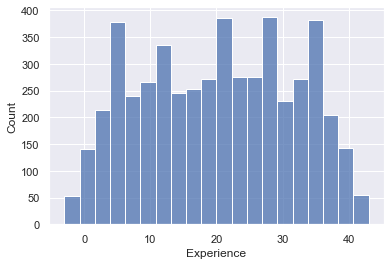

In [10]:
sns.histplot(df['Experience'])

In [11]:
df[df['Experience'] < 0]['Age'].describe()

count    52.000000
mean     24.519231
std       1.475159
min      23.000000
25%      24.000000
50%      24.000000
75%      25.000000
max      29.000000
Name: Age, dtype: float64

In [12]:
df[df['Experience'] < 0]['Experience'].describe()

count    52.000000
mean     -1.442308
std       0.639039
min      -3.000000
25%      -2.000000
50%      -1.000000
75%      -1.000000
max      -1.000000
Name: Experience, dtype: float64

**It seems there is typo in the Experience value for all this, it can treated taking modulus of this.**
-  Assuming the 'negative' sign to be typo error.

In [13]:
df.loc[df['Experience'] < 0, 'Experience'] = -df.loc[df['Experience'] < 0, 'Experience'] #taking the negative of it.

In [14]:
df['Experience'].describe()

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [15]:
df['ZIPCode'].astype(str).describe()

count      5000
unique      467
top       94720
freq        169
Name: ZIPCode, dtype: object

**There are 467 different ZIPCode, so it is better to encapsulate it further. As per the basic research done on this on internet, the first three digit represents the unique city. So we can consider only first three digit of zipcode**

In [16]:
df['ZIPCode_str'] = df['ZIPCode'].astype(str)

In [17]:
def first_three(val):
    if isinstance(val,str):
        return val[:3]
    else: 
        return None
    

In [18]:
df['ZIPCode_str'] = df['ZIPCode_str'].apply(first_three)

In [19]:
df['ZIPCode_str'].nunique()

57

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
 14  ZIPCode_str         5000 non-null   object 
dtypes: float64(1), int64(13), object(1)
memory usage: 586.1

**Dropping the ID axis from the dataset.**

In [21]:
df.drop('ID', axis =1, inplace = True)

In [22]:
df.drop('ZIPCode', axis =1, inplace = True)  # we are now considering only ZIPCode_str for further modeling.

In [23]:
df

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1      49       4    1.6          1         0   
1      45          19      34       3    1.5          1         0   
2      39          15      11       1    1.0          1         0   
3      35           9     100       1    2.7          2         0   
4      35           8      45       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3      40       1    1.9          3         0   
4996   30           4      15       4    0.4          1        85   
4997   63          39      24       2    0.3          3         0   
4998   65          40      49       3    0.5          2         0   
4999   28           4      83       3    0.8          1         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0                 0                   1           0       0           0   
1                 0                   1           0       0           0   
2                 0                   0           0       0           0   
3                 0                   0           0       0           0   
4                 0                   0           0       0           1   
...             ...                 ...         ...     ...         ...   
4995              0                   0           0       1           0   
4996              0                   0           0       1           0   
4997              0                   0           0       0           0   
4998              0                   0           0       1           0   
4999              0                   0           0       1           1   

     ZIPCode_str  
0            911  
1            900  
2            947  
3            941  
4            913  
...          ...  
4995         926  
4996         920  
4997         930  
4998         900  
4999         926  

[5000 rows x 13 columns]

In [24]:
df['Personal_Loan'].describe()

count    5000.000000
mean        0.096000
std         0.294621
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Personal_Loan, dtype: float64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal_Loan       5000 non-null   int64  
 8   Securities_Account  5000 non-null   int64  
 9   CD_Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
 12  ZIPCode_str         5000 non-null   object 
dtypes: float64(1), int64(11), object(1)
memory usage: 507.9+ KB


### Fixing the data types
* Personal_Loan, Securities_Account, CD_Account, 'Online', 'CreditCard', 'ZIPCode_str' and Education are of int/object type, we can change them to categories.

`converting "objects" to "category" reduces the data space required to store the dataframe`

In [26]:
cat_col = ['Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_str', 'Education']

df[cat_col] = df[cat_col].astype("category")


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   int64   
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal_Loan       5000 non-null   category
 8   Securities_Account  5000 non-null   category
 9   CD_Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
 12  ZIPCode_str         5000 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 272.2 KB


`we can see that the memory usage has decreased by half.`

In [28]:
df.describe().T

count       mean         std   min   25%   50%    75%    max
Age         5000.0  45.338400   11.463166  23.0  35.0  45.0   55.0   67.0
Experience  5000.0  20.134600   11.415189   0.0  10.0  20.0   30.0   43.0
Income      5000.0  73.774200   46.033729   8.0  39.0  64.0   98.0  224.0
Family      5000.0   2.396400    1.147663   1.0   1.0   2.0    3.0    4.0
CCAvg       5000.0   1.937938    1.747659   0.0   0.7   1.5    2.5   10.0
Mortgage    5000.0  56.498800  101.713802   0.0   0.0   0.0  101.0  635.0

**Observation :**| 
- Age in dataset is ranged between 23 to 67 years, having experience of maximum 43 years.
- Income is widley distributed between 8K to 224K USD.
- Family size is of 1 to 4 people.
- Most of the people have 0 mortgage but have few as high as 635 K USD.
- Average spending on credit cards per month is between 0 to (in thousand dollars)

In [29]:
df.describe(include = ['category']).T

count unique  top  freq
Education           5000      3    1  2096
Personal_Loan       5000      2    0  4520
Securities_Account  5000      2    0  4478
CD_Account          5000      2    0  4698
Online              5000      2    1  2984
CreditCard          5000      2    0  3530
ZIPCode_str         5000     57  900   375

**Observation :**
- Most of depositor is of Undergrad Education Level.
- We can see very few people have opted for personal loan, as 4520 out of 5000 have not accepted the same.
- Around 60% customers use internet banking facilities.

# Exploratory Data Analysis

## Univariate Analysis

**Central tendency and dispersion**

In [30]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   int64   
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal_Loan       5000 non-null   category
 8   Securities_Account  5000 non-null   category
 9   CD_Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
 12  ZIPCode_str         5000 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 272.2 KB


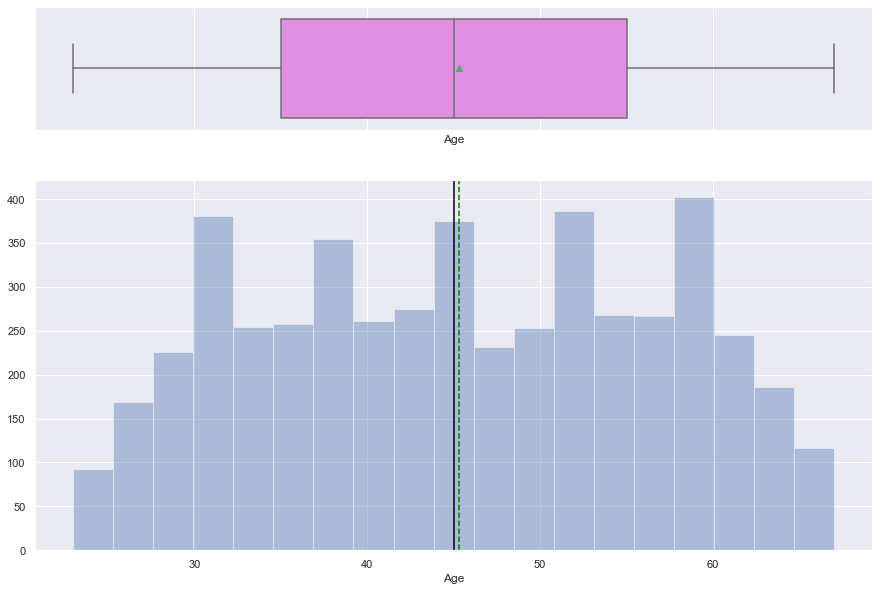

In [32]:
histogram_boxplot(df['Age'])

**Age of customers are well distributed with an average of 45 years.**

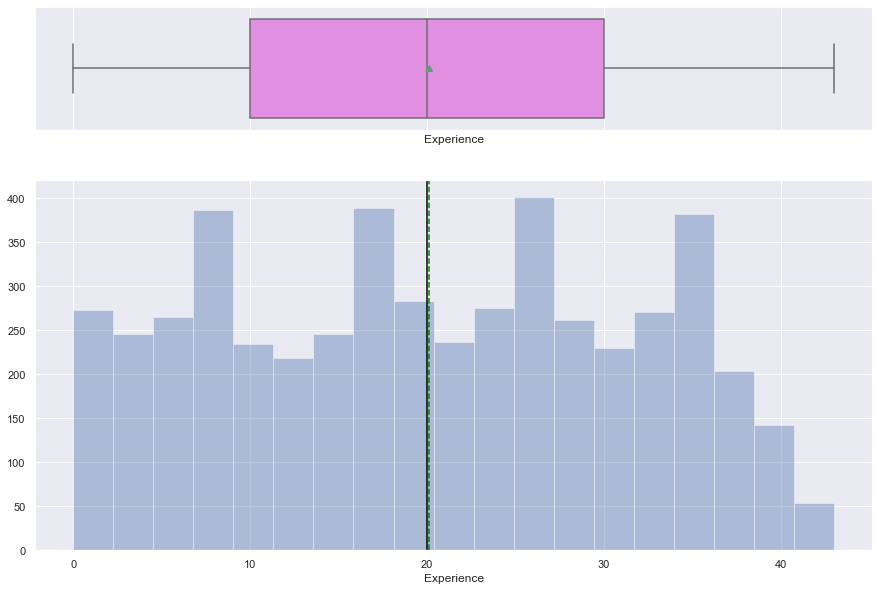

In [33]:
histogram_boxplot(df['Experience'])

**Customers' experiences are also nearly - equaly distributed with an average of 20 years of experiences.**

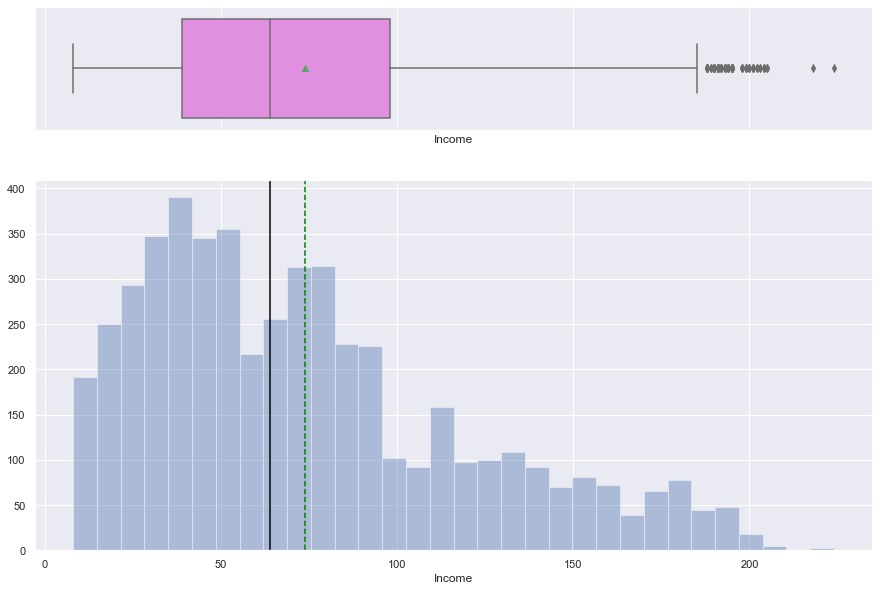

In [34]:
histogram_boxplot(df['Income'])

**Income has some outliers present in the data and is right skewed**

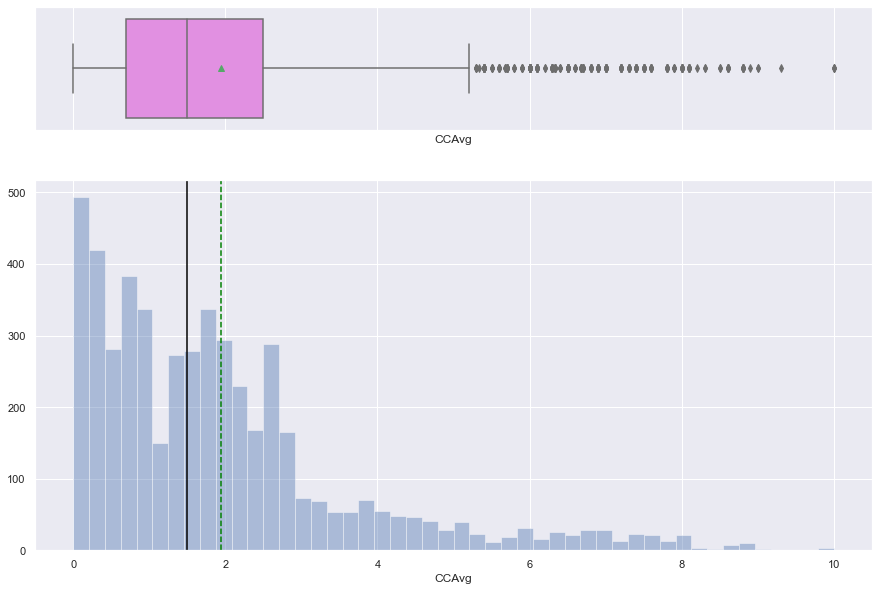

In [35]:
histogram_boxplot(df['CCAvg'])

**CCAvg has some outliers present in the data and is right skewed**

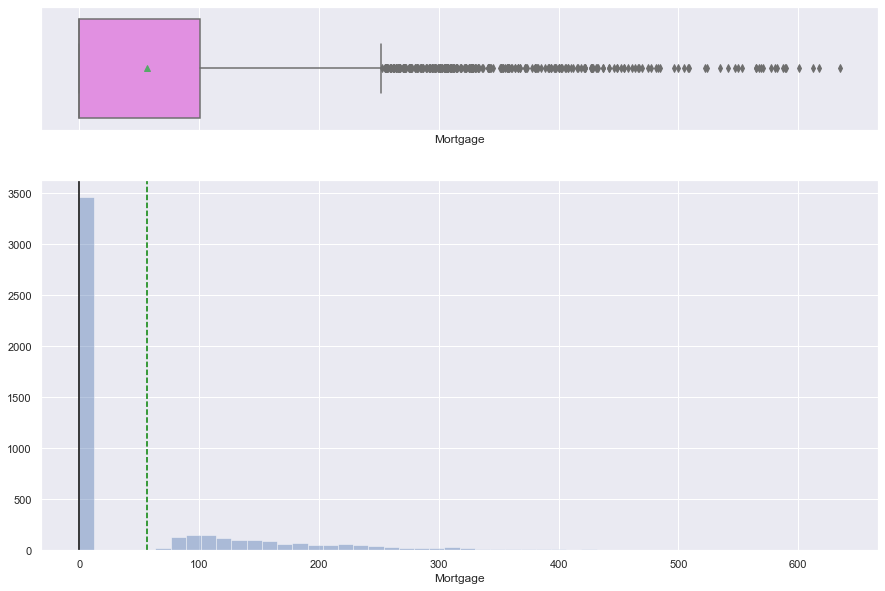

In [36]:
histogram_boxplot(df['Mortgage'])

**Mortgage has some outliers present in the data and is right skewed**

- Thus, We have outliers present in Income, CCAvg and Mortgage and we would need to treat these outliers appropriately.

In [37]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

**Family Size**

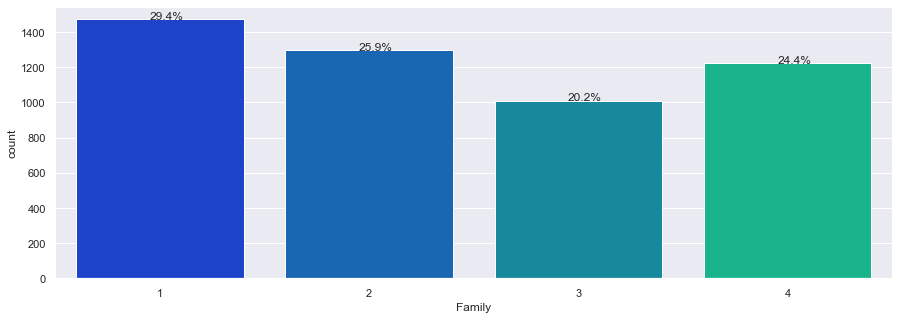

In [38]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df['Family'],palette='winter')
perc_on_bar(ax,df['Family'])

**`Family size of customers are balanced distributed, with max of family size of 1 (29.4%)`**

**Education**

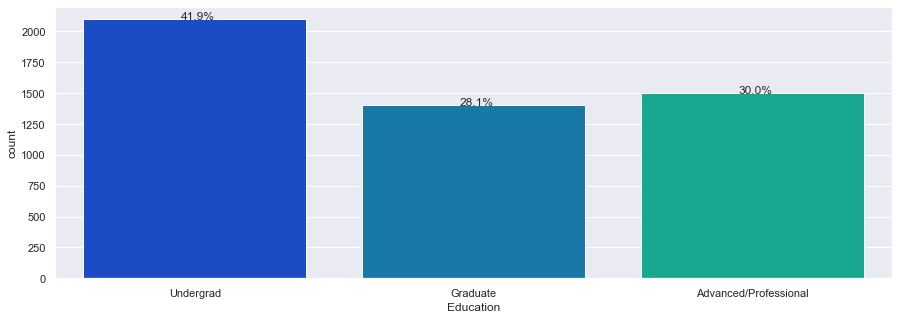

In [39]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df['Education'].apply(lambda x : 'Undergrad' if x == 1 else 'Graduate' if x== 2 else 'Advanced/Professional'),palette='winter')
perc_on_bar(ax,df['Education'])

**`Most of the customers are of Underagrad level with total percentage of nearly 42%.`**

**Securities_Account**

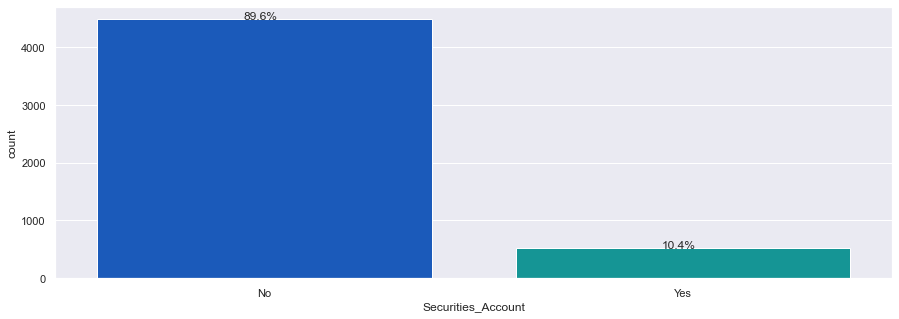

In [40]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df['Securities_Account'].apply(lambda x : 'No' if x ==0 else 'Yes'),palette='winter')
perc_on_bar(ax,df['Securities_Account'])

**`Most of the customers (89.6%) don't have securities account with the bank`**

**CD_Account**

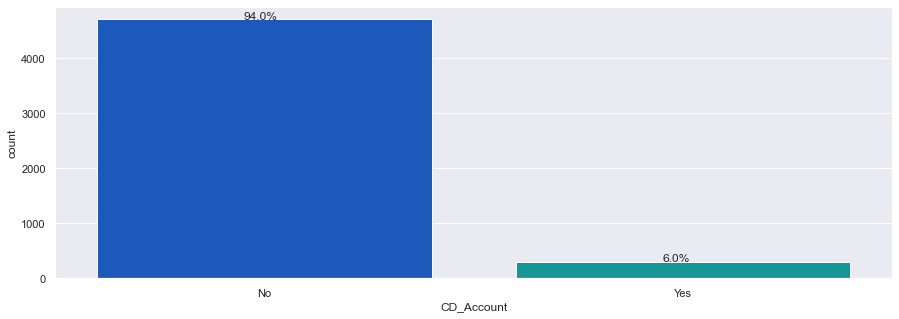

In [41]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df['CD_Account'].apply(lambda x : 'No' if x ==0 else 'Yes'),palette='winter')
perc_on_bar(ax,df['CD_Account'])

**`Most of the customers (94%) don't have a certificate of deposit (CD) account with the bank`**

**Online**

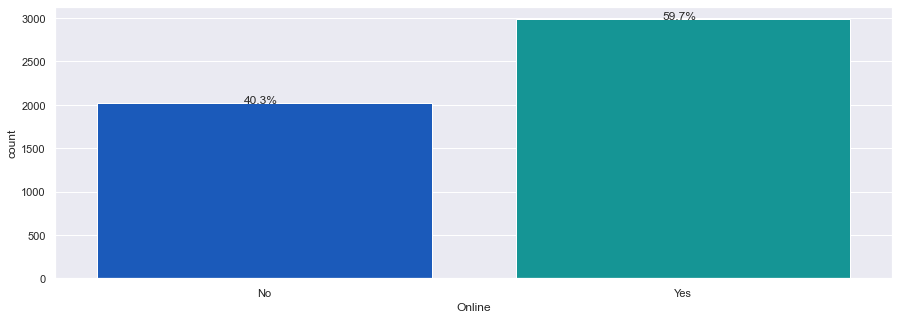

In [42]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df['Online'].apply(lambda x : 'No' if x ==0 else 'Yes'),palette='winter')
perc_on_bar(ax,df['Online'])

**`More than half of the custmers use internet banking facilities.`**

**ZIPCode_Str**

<AxesSubplot:xlabel='ZIPCode_str', ylabel='count'>

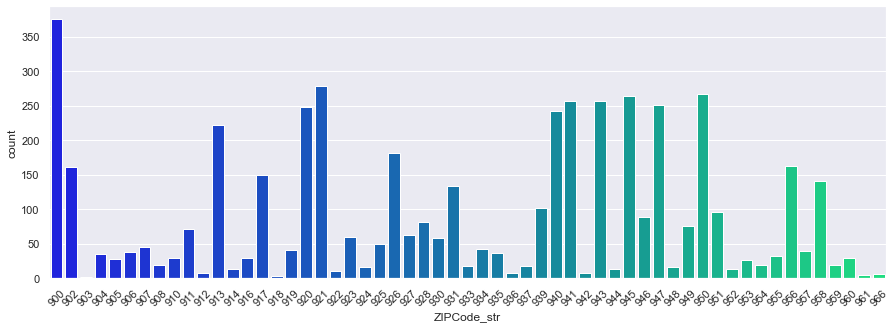

In [43]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.countplot(df['ZIPCode_str'],palette='winter')


**Label -  Personal_Loan**

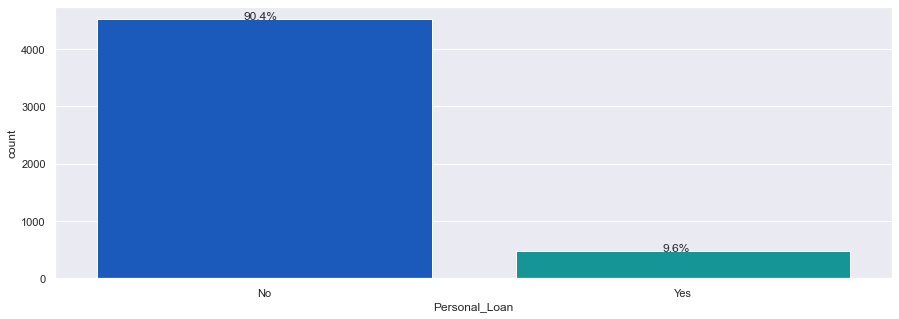

In [44]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df['Personal_Loan'].apply(lambda x : 'No' if x ==0 else 'Yes'),palette='winter')
perc_on_bar(ax,df['Personal_Loan'])

**We can see here that dataset is imbalanced as there are 90.4% is in in NO label and other are only 9.6% (who have taken loan)**

## Bivariate Analysis

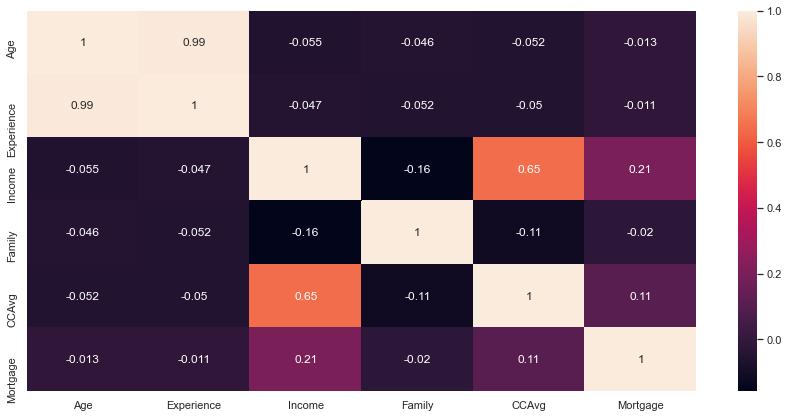

In [45]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

- **`Experience and Age seem to be highly correlated`**
- **`CCAvg and Income also are having good correation`**

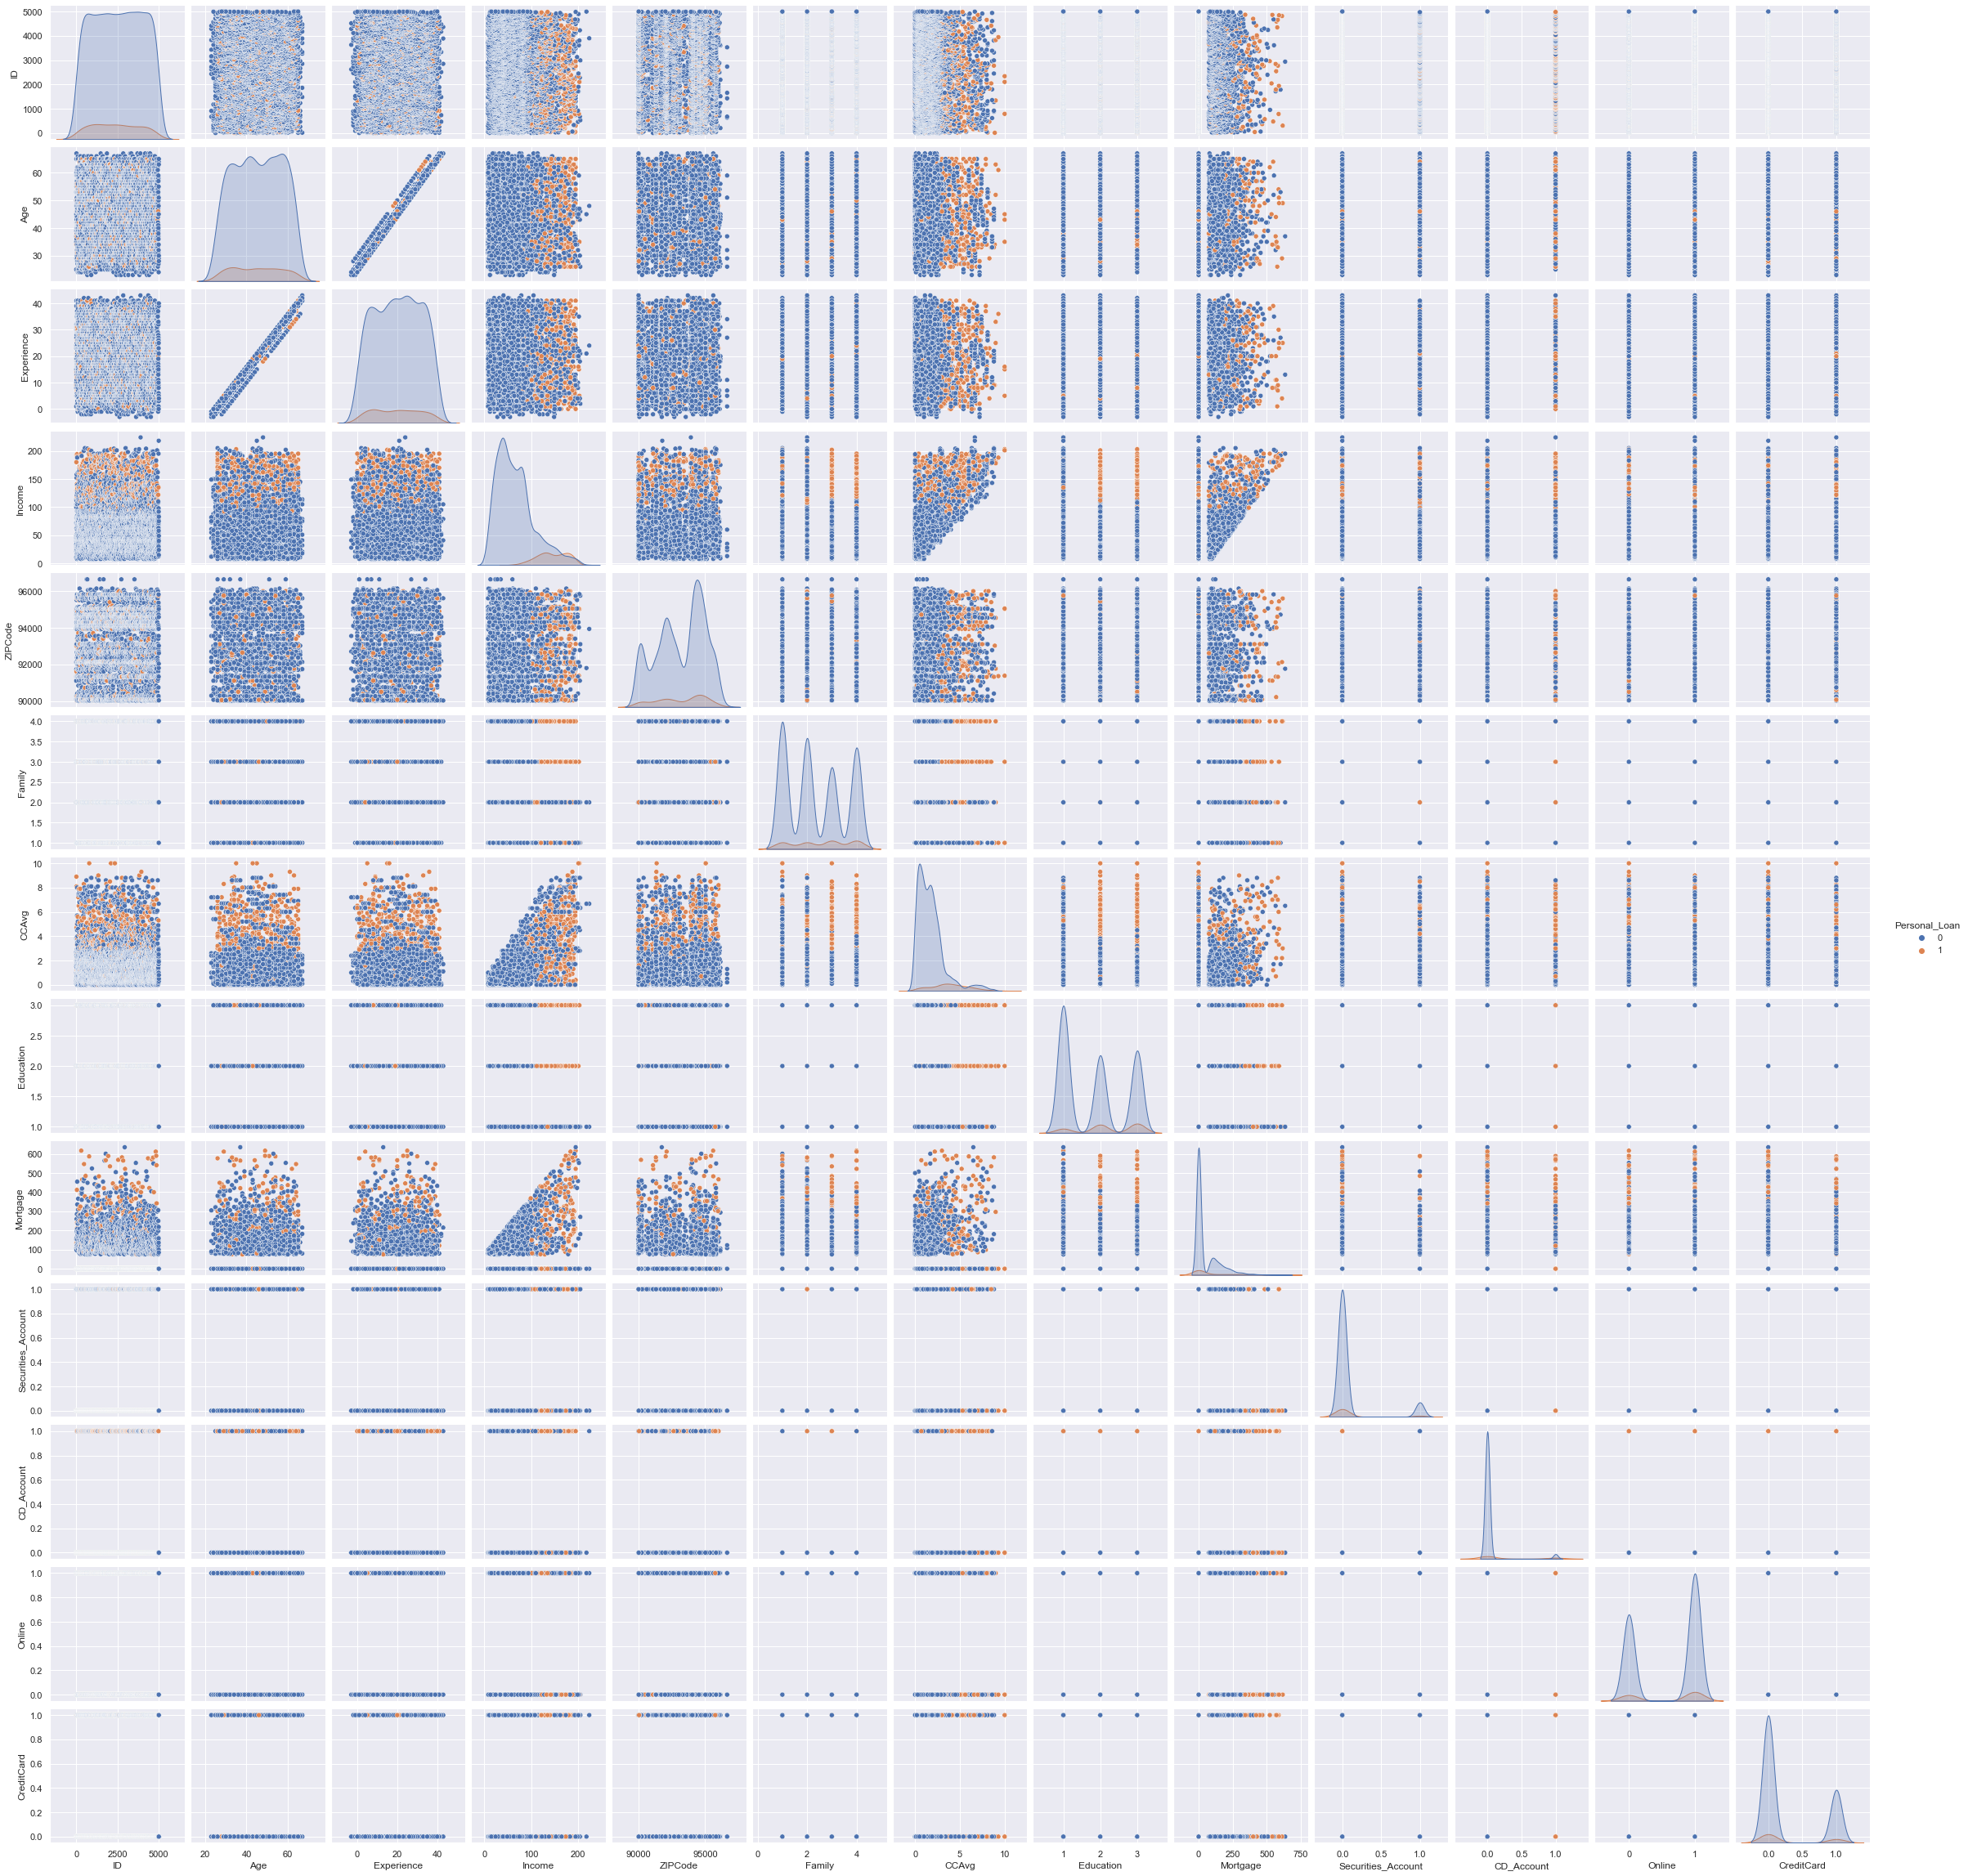

In [46]:
sns.pairplot(data=data, hue = 'Personal_Loan')
plt.show()

- **Experience and Age are highly (+) correlated**
- Income and CCAvg have some amount ofcorrelation

### Personal_Loan vs Age, Experience, Income, Family

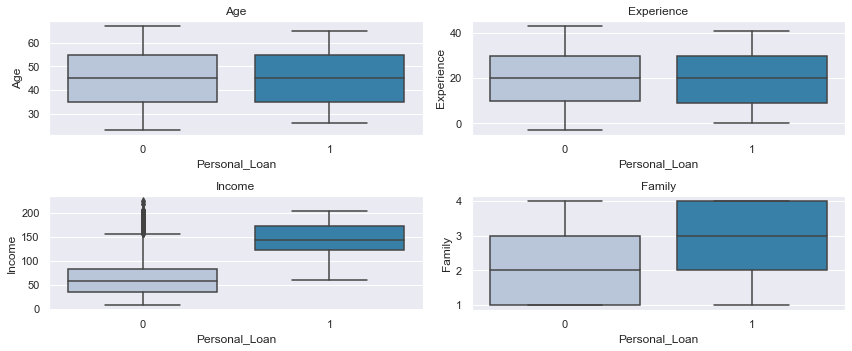

In [47]:
cols = df[['Age', 'Experience', 'Income', 'Family']].columns.tolist()
plt.figure(figsize=(12,7))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(df["Personal_Loan"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

**Visualizing the same after removing the outliers**

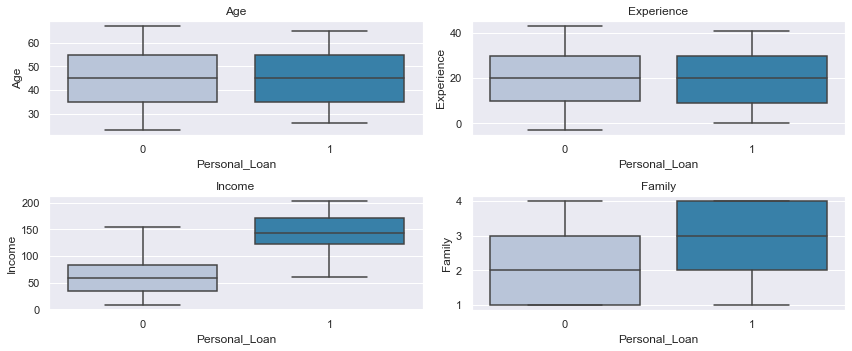

In [48]:
cols = df[['Age', 'Experience', 'Income', 'Family']].columns.tolist()
plt.figure(figsize=(12,7))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(df["Personal_Loan"],data[variable],palette="PuBu", showfliers=False)
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

**Insights :** 
-  We can see the proper relation between Income and Personal_Loan. Higher income customer segments are most likely to be targeted for loan.
- Family size is also having the similar observation.

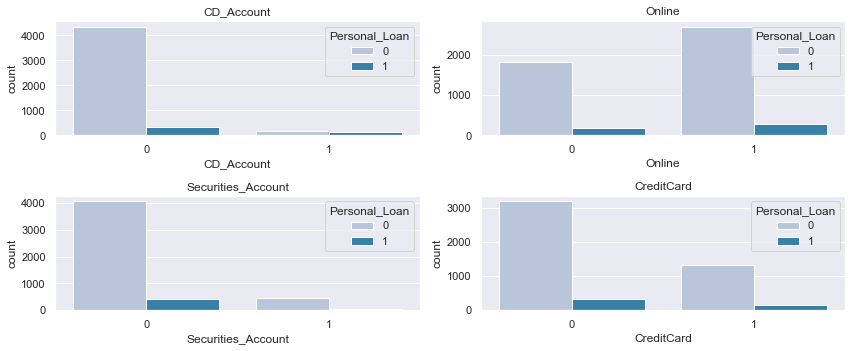

In [49]:
cols = df[['CD_Account', 'Online', 'Securities_Account', 'CreditCard']].columns.tolist()
plt.figure(figsize=(12,7))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.countplot(data[variable],palette="PuBu", hue = df["Personal_Loan"])
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

- Though this doesn't represent it well in proportion since differnt classes in features/parametrs are disproportianate.
- Most of the customers who have taken loan are having securities account. 
- Custoers using Online banking facility can also be well targeted.

### Data Preperation

**Skewness Treatment**
- As we have seen Mortgage and CCAvg are highly positively skewed. We can do the log.

**Log Transformations**

In [50]:
df['Mortgage' + '_log'] = np.log(df['Mortgage'] + 1)
df['CCAvg' + '_log'] = np.log(df['CCAvg'] + 1)

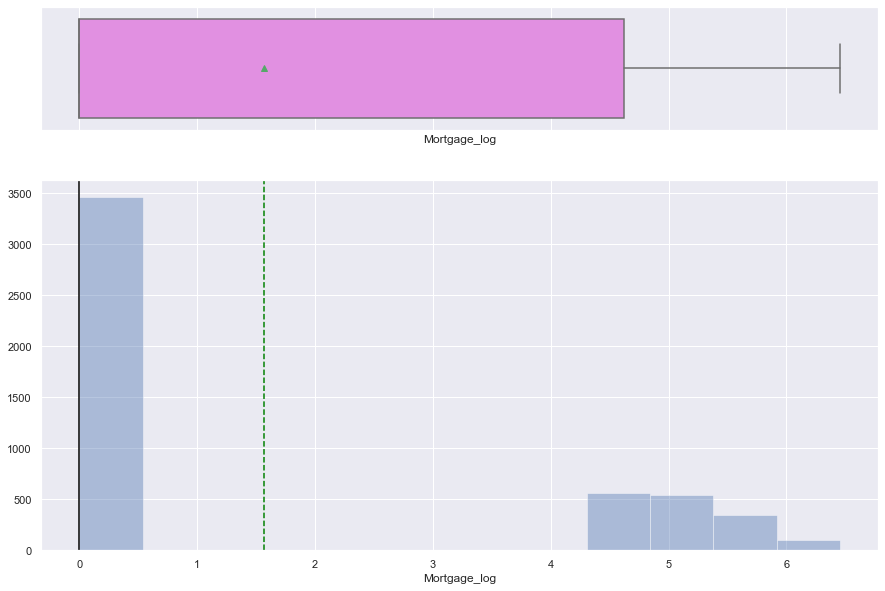

In [51]:
histogram_boxplot(df['Mortgage_log'])

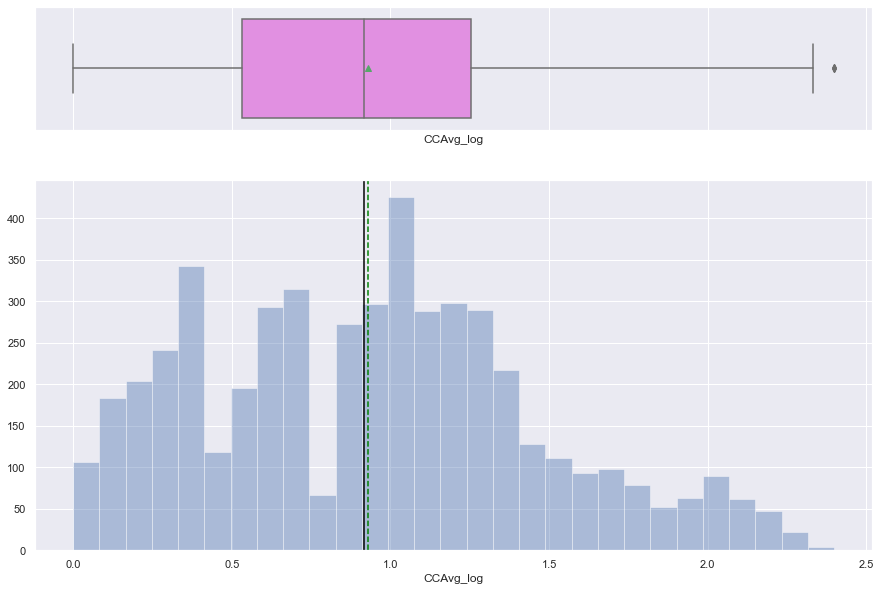

In [52]:
histogram_boxplot(df['CCAvg_log'])

**We can see now that skewness in these features are well removed.**

In [53]:
df.drop('Mortgage', axis =1, inplace = True)
df.drop('CCAvg', axis =1, inplace = True)   # since we will be considering the log transformed value.

### Outlier Treatment

In [54]:

def outliers_action(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def outliers_action_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = outliers_action(df,c)
        
    return df



In [55]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()

df_bot = df.copy() #before outiler treatment

df = outliers_action_all(df,numerical_col) 

In [56]:
df.head(5)

Age  Experience  Income  Family Education Personal_Loan Securities_Account  \
0   25           1    49.0       4         1             0                  1   
1   45          19    34.0       3         1             0                  1   
2   39          15    11.0       1         1             0                  0   
3   35           9   100.0       1         2             0                  0   
4   35           8    45.0       4         2             0                  0   

  CD_Account Online CreditCard ZIPCode_str  Mortgage_log  CCAvg_log  
0          0      0          0         911           0.0   0.955511  
1          0      0          0         900           0.0   0.916291  
2          0      0          0         947           0.0   0.693147  
3          0      0          0         941           0.0   1.308333  
4          0      0          1         913           0.0   0.693147

# Logistic Regression

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   float64 
 3   Family              5000 non-null   int64   
 4   Education           5000 non-null   category
 5   Personal_Loan       5000 non-null   category
 6   Securities_Account  5000 non-null   category
 7   CD_Account          5000 non-null   category
 8   Online              5000 non-null   category
 9   CreditCard          5000 non-null   category
 10  ZIPCode_str         5000 non-null   category
 11  Mortgage_log        5000 non-null   float64 
 12  CCAvg_log           5000 non-null   float64 
dtypes: category(7), float64(3), int64(3)
memory usage: 272.2 KB


In [58]:
X = df.drop(['Personal_Loan'], axis=1)
Y = df['Personal_Loan']

X = pd.get_dummies(X,drop_first=True)

#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1)

In [59]:
# dataframe with numerical column only
num_feature_set = X.copy()
num_feature_set = add_constant(num_feature_set)
num_feature_set = num_feature_set.astype(float)

## Checking for multicollinearity (using VIF)

In [60]:
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                   456.238385
Age                      90.424937
Experience               90.357801
Income                    1.707813
Family                    1.059463
Mortgage_log              1.015060
CCAvg_log                 1.586982
Education_2               1.300535
Education_3               1.337323
Securities_Account_1      1.149504
CD_Account_1              1.340867
Online_1                  1.057147
CreditCard_1              1.118592
ZIPCode_str_902           1.387559
ZIPCode_str_903           1.006713
ZIPCode_str_904           1.087124
ZIPCode_str_905           1.070475
ZIPCode_str_906           1.097299
ZIPCode_str_907           1.111540
ZIPCode_str_908           1.049807
ZIPCode_str_910           1.072730
ZIPCode_str_911           1.175663
ZIPCode_str_912           1.020526
ZIPCode_str_913           1.523175
ZIPCode_str_914           1.034428
ZIPCode_str_916           1.072901
ZIPCode_str_917           1.361497
ZIPCode_str_918     

## Dropping multi-collinear variables

In [61]:
# variables of high collinearit y: Age and Experience

num_feature_set = num_feature_set.drop('Experience',axis=1)  #Dropped Experience

In [62]:
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                   45.410686
Age                      1.019475
Income                   1.703068
Family                   1.058157
Mortgage_log             1.015050
CCAvg_log                1.580874
Education_2              1.284812
Education_3              1.260427
Securities_Account_1     1.149280
CD_Account_1             1.340399
Online_1                 1.057126
CreditCard_1             1.118592
ZIPCode_str_902          1.387525
ZIPCode_str_903          1.006705
ZIPCode_str_904          1.087105
ZIPCode_str_905          1.070068
ZIPCode_str_906          1.097297
ZIPCode_str_907          1.111478
ZIPCode_str_908          1.048334
ZIPCode_str_910          1.072023
ZIPCode_str_911          1.175454
ZIPCode_str_912          1.020434
ZIPCode_str_913          1.523159
ZIPCode_str_914          1.034381
ZIPCode_str_916          1.072900
ZIPCode_str_917          1.361039
ZIPCode_str_918          1.009518
ZIPCode_str_919          1.103880
ZIPCode_str_9

In [63]:
X_train, X_test, y_train, y_test = train_test_split(num_feature_set, Y, test_size=0.30, random_state = 1)

### Defining Metric Scores and Confusion Matrix

In [64]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
     # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [65]:
def make_confusion_matrix(model,test_X,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(test_X)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Logistic Regression Model

Accuracy on training set :  0.9622857142857143
Accuracy on test set :  0.956
Recall on training set :  0.676737160120846
Recall on test set :  0.6375838926174496
Precision on training set :  0.8995983935742972
Precision on test set :  0.8878504672897196
F1 on training set :  0.7724137931034483
F1 on test set :  0.7421875000000001


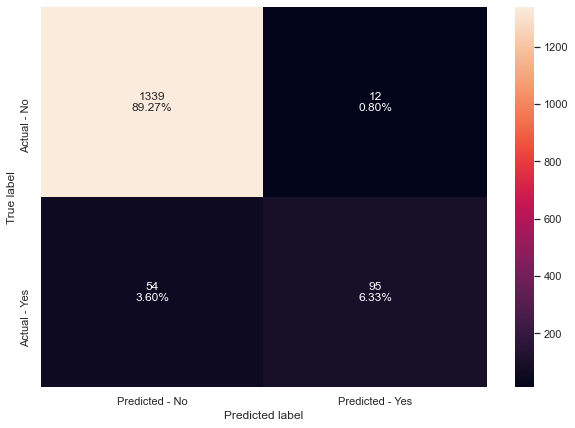

In [66]:
model = LogisticRegression(random_state=1)


lg = model.fit(X_train,y_train)
scores_LR = get_metrics_score(lg,X_train,X_test,y_train,y_test,flag=True)

# creating confusion matrix
make_confusion_matrix(lg,X_test,y_test)

* ROC-AUC on training set

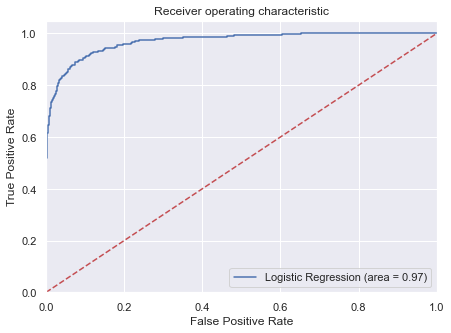

In [67]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:,1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

* ROC-AUC on test set

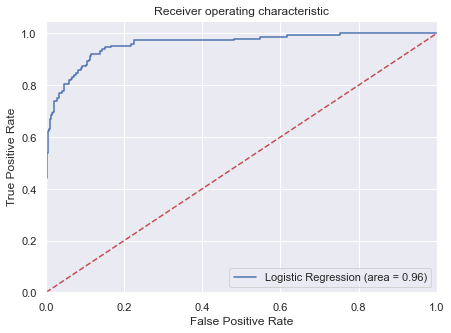

In [68]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a generalized performance on training and test set.

### Finding the coefficients

In [69]:
log_odds = lg.coef_[0]
pd.DataFrame(log_odds, X_train.columns, columns=['coef']).T

const       Age    Income    Family  Mortgage_log  CCAvg_log  \
coef -5.477449 -0.007668  0.054143  0.568642      0.039007   0.750803   

      Education_2  Education_3  Securities_Account_1  CD_Account_1  Online_1  \
coef     3.013661      3.25851             -1.153481      3.580784 -0.682171   

      CreditCard_1  ZIPCode_str_902  ZIPCode_str_903  ZIPCode_str_904  \
coef     -1.482897        -0.522562        -0.002407         -0.10248   

      ZIPCode_str_905  ZIPCode_str_906  ZIPCode_str_907  ZIPCode_str_908  \
coef         0.050598         0.064929        -0.063338        -0.047838   

      ZIPCode_str_910  ZIPCode_str_911  ZIPCode_str_912  ZIPCode_str_913  \
coef        -0.112674          0.12469         0.075994        -0.101849   

      ZIPCode_str_914  ZIPCode_str_916  ZIPCode_str_917  ZIPCode_str_918  \
coef         0.065596        -0.169466         -0.37368        -0.078928   

      ZIPCode_str_919  ZIPCode_str_920  ZIPCode_str_921  ZIPCode_str_922  \
coef        -0.150566        -0.052926         0.040397         0.123552   

      ZIPCode_str_923  ZIPCode_str_924  ZIPCode_str_925  ZIPCode_str_926  \
coef        -0.346153        -0.174083         0.051685        -0.050046   

      ZIPCode_str_927  ZIPCode_str_928  ZIPCode_str_930  ZIPCode_str_931  \
coef        -0.135724        -0.208738         0.177316         -0.07196   

      ZIPCode_str_933  ZIPCode_str_934  ZIPCode_str_935  ZIPCode_str_936  \
coef         0.204896        -0.122246         0.111407        -0.024566   

      ZIPCode_str_937  ZIPCode_str_939  ZIPCode_str_940  ZIPCode_str_941  \
coef         0.057847        -0.182919        -0.840197         -0.06439   

      ZIPCode_str_942  ZIPCode_str_943  ZIPCode_str_944  ZIPCode_str_945  \
coef          0.02293        -0.278356        -0.020904        -0.421773   

      ZIPCode_str_946  ZIPCode_str_947  ZIPCode_str_948  ZIPCode_str_949  \
coef        -0.239679        -0.162533         0.154484         0.324439   

      ZIPCode_str_950  ZIPCode_str_951  ZIPCode_str_952  ZIPCode_str_953  \
coef        -0.216993        -0.006979         0.031387        -0.230386   

      ZIPCode_str_954  ZIPCode_str_955  ZIPCode_str_956  ZIPCode_str_957  \
coef         -0.02778        -0.162908        -0.467028          0.08394   

      ZIPCode_str_958  ZIPCode_str_959  ZIPCode_str_960  ZIPCode_str_961  \
coef        -0.068721         -0.08167        -0.109387        -0.071638   

      ZIPCode_str_966  
coef        -0.010691

**Insights :**

### Optimal threshold using AUC-ROC curve

In [70]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test, lg.predict_proba(X_test)[:,1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.07485880528634553


In [71]:
# Model prediction with optimal threshold

pred_train_opt = (lg.predict_proba(X_train)[:,1]>optimal_threshold)
pred_test_opt = (lg.predict_proba(X_test)[:,1]>optimal_threshold)

print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt))

print('Recall on train data:',recall_score(y_train, pred_train_opt) )
print('Recall on test data:',recall_score(y_test, pred_test_opt))

print('Precision on train data:',precision_score(y_train, pred_train_opt) )
print('Precision on test data:',precision_score(y_test, pred_test_opt))

print('F1 Score on train data:',f1_score(y_train, pred_train_opt) )
print('F1 Score on test data:',f1_score(y_test, pred_test_opt))

print('ROC-AUC Score on train data:',roc_auc_score(y_train, pred_train_opt) )
print('ROC-AUC Score on test data:',roc_auc_score(y_test, pred_test_opt))

Accuracy on train data: 0.8774285714285714
Accuracy on test data: 0.8866666666666667
Recall on train data: 0.9274924471299094
Recall on test data: 0.912751677852349
Precision on train data: 0.4311797752808989
Precision on test data: 0.4641638225255973
F1 Score on train data: 0.588686481303931
F1 Score on test data: 0.6153846153846154
ROC-AUC Score on train data: 0.8998459395636925
ROC-AUC Score on test data: 0.8982707315982693


### Recall is good at 91-92%, here the Recall is metric of interest, since we don't want to miss potential customers from giving the loan.

#### Let's use Precision-Recall curve and see if we can find a better threshold

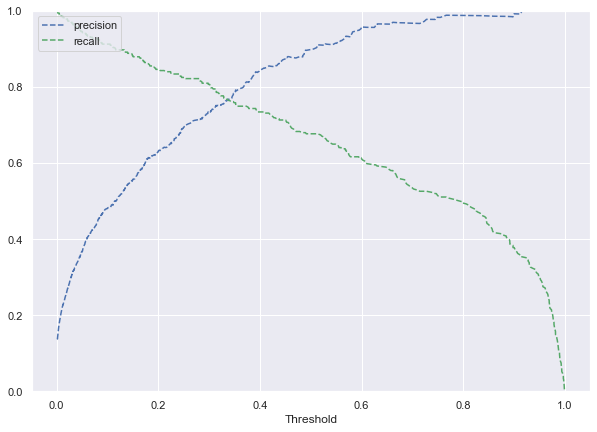

In [72]:
y_scores=lg.predict_proba(X_train)[:,1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At 0.35 threshold we get a higher recall and a good precision.

In [73]:
optimal_threshold = 0.35

# Model prediction with optimal threshold
pred_train_opt = (lg.predict_proba(X_train)[:,1]>optimal_threshold)
pred_test_opt = (lg.predict_proba(X_test)[:,1]>optimal_threshold)

#Model performance with optimal threhold

print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt))

print('Recall on train data:',recall_score(y_train, pred_train_opt))
print('Recall on test data:',recall_score(y_test, pred_test_opt))

print('Precision on train data:',precision_score(y_train, pred_train_opt) )
print('Precision on test data:',precision_score(y_test, pred_test_opt))

print('F1 Score on train data:',f1_score(y_train, pred_train_opt) )
print('F1 Score on test data:',f1_score(y_test, pred_test_opt))

print('ROC-AUC Score on train data:',roc_auc_score(y_train, pred_train_opt) )
print('ROC-AUC Score on test data:',roc_auc_score(y_test, pred_test_opt))

Accuracy on train data: 0.9574285714285714
Accuracy on test data: 0.9546666666666667
Recall on train data: 0.7583081570996979
Recall on test data: 0.7248322147651006
Precision on train data: 0.784375
Precision on test data: 0.8
F1 Score on train data: 0.7711213517665132
F1 Score on test data: 0.7605633802816901
ROC-AUC Score on train data: 0.8682673634977821
ROC-AUC Score on test data: 0.8524235093070506


* Model is performing well on training and test set.
* Recall has reduced by changing the optimal threshold to 0.35 which in turn has reduced the F1 score.

-----

# Decision Tree Model

## Build Decision Tree Model

* DecisionTreeClassifier using default 'gini' criteria
* class_weight = {0:0.15,1:0.85}, since we have imbalanced dataset having 90% label -0 and 10% label -1.

In [74]:
df = df_bot.copy()  #considering the before of outlier treatment data. Since outlier doesn't affect the decision tree predominantly.


X = df.drop(['Personal_Loan'], axis=1)
Y = df['Personal_Loan']

X = pd.get_dummies(X,drop_first=True)

#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1)

In [75]:
df['Personal_Loan'].value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

In [76]:
model = DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=1)

In [77]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

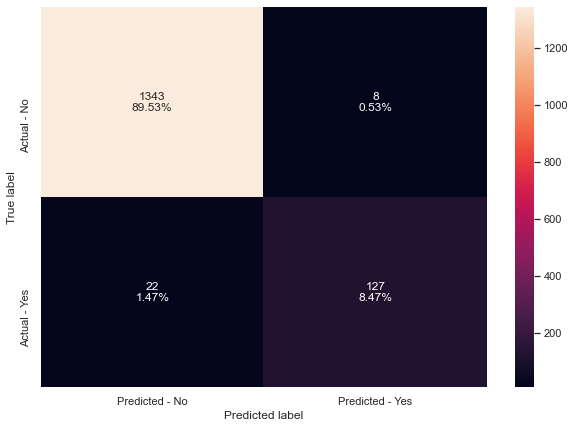

In [78]:
make_confusion_matrix(model,X_test,y_test)

In [79]:
lg = model.fit(X_train,y_train)
scores_LR = get_metrics_score(lg,X_train,X_test,y_train,y_test,flag=True)

Accuracy on training set :  1.0
Accuracy on test set :  0.98
Recall on training set :  1.0
Recall on test set :  0.8523489932885906
Precision on training set :  1.0
Precision on test set :  0.9407407407407408
F1 on training set :  1.0
F1 on test set :  0.8943661971830986


* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

In [80]:
column_names = list(X.columns)                     
feature_names = column_names

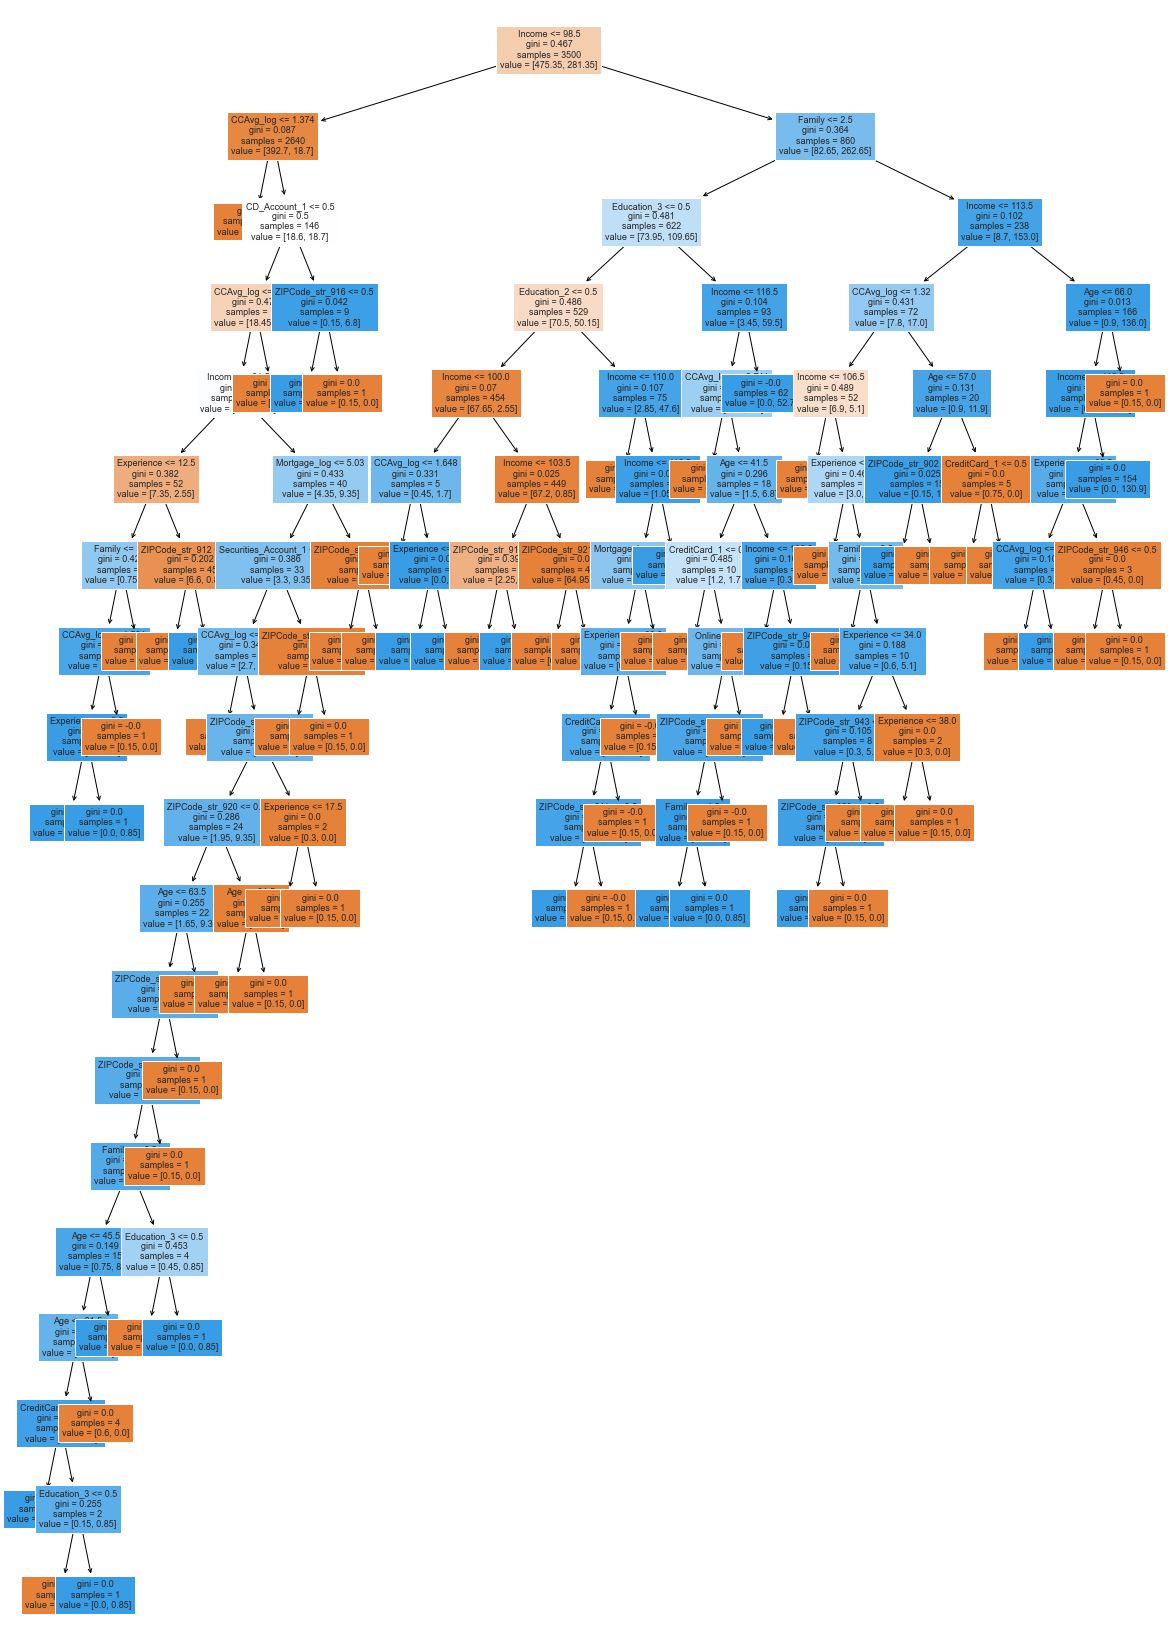

In [81]:
plt.figure(figsize=(20,30))
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

**`Tree is so much complexed to reach perfect acccuracy in training data. We would need some pruning technique to regularize it and prevent it from overfitting.`**

In [82]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg_log <= 1.37
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg_log >  1.37
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- CCAvg_log <= 1.60
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Experience <= 12.50
|   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |--- CCAvg_log <= 1.50
|   |   |   |   |   |   |   |   |--- Experience <= 9.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |   |--- Experience >  9.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |--- CCAvg_log >  1.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- Experience >  12.50
|   |   |   |   |   |   |--- ZIPCode_str_912 <= 0.50
|   |   |   |   |   |   |   |--- weights: [6.60, 0.0

In [83]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
Income                5.925490e-01
Education_2           1.366862e-01
CCAvg_log             7.669675e-02
Education_3           6.801488e-02
Family                6.538135e-02
Experience            1.181195e-02
CD_Account_1          1.099955e-02
Age                   9.812775e-03
Mortgage_log          5.040802e-03
ZIPCode_str_912       4.260592e-03
ZIPCode_str_913       3.490624e-03
CreditCard_1          2.775538e-03
Securities_Account_1  1.946974e-03
Online_1              1.233310e-03
ZIPCode_str_920       1.193814e-03
ZIPCode_str_956       1.132065e-03
ZIPCode_str_902       8.381360e-04
ZIPCode_str_916       8.303834e-04
ZIPCode_str_940       8.244521e-04
ZIPCode_str_950       8.244521e-04
ZIPCode_str_911       8.015507e-04
ZIPCode_str_921       7.798872e-04
ZIPCode_str_943       7.786492e-04
ZIPCode_str_926       6.572666e-04
ZIPCode_str_955       6.390933e-04
ZIPCode_str_951       9.987819e-18
ZIPCode_str_946       5.653483e-18
ZIPCode_str_914     

**Income and Education are among the high importance feature for this classification model.**

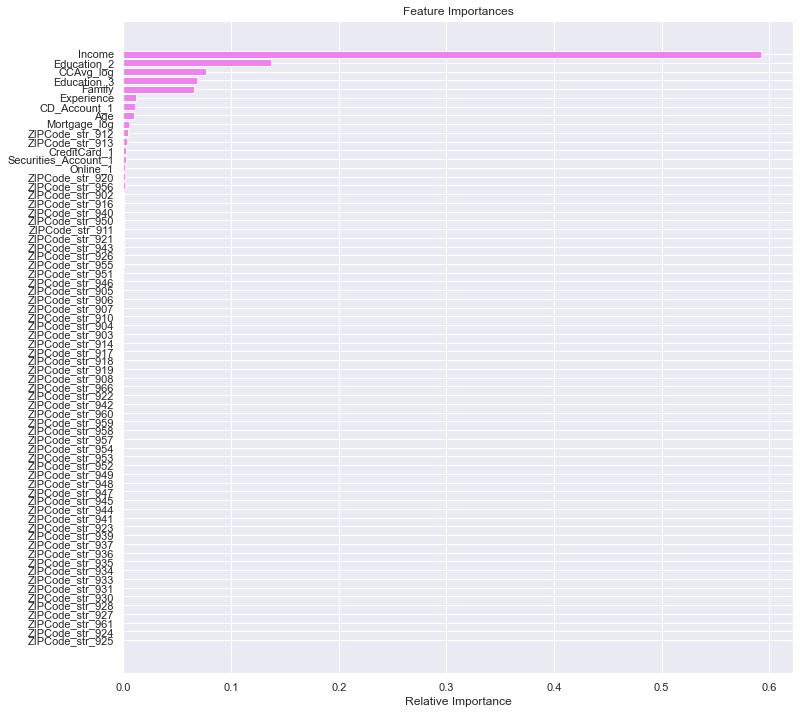

In [84]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* According to the decision tree model, Income is the most important variable for predicting the Revenue.

**The tree above is very complex and difficult to interpret.**

## Reducing over fitting

### Using GridSearch for Hyperparameter tuning of our tree model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1,class_weight = {0:.15,1:.85})

# Grid of parameters to choose from
parameters = {
            'max_depth': np.arange(1,10),
            'criterion': ['entropy','gini'],
            'splitter': ['best','random'],
            'min_impurity_decrease': [0.000001,0.00001,0.0001],
            'max_features': ['log2','sqrt']
             }


#  Recall is metric of interest, since we don't want to miss potential customers from giving the loan.
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
model2=estimator.fit(X_train, y_train)

In [87]:
estimator

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=2, max_features='sqrt',
                       min_impurity_decrease=1e-06, random_state=1)

In [88]:
scores_LR = get_metrics_score(estimator,X_train,X_test,y_train,y_test,flag=True)

Accuracy on training set :  0.8205714285714286
Accuracy on test set :  0.8
Recall on training set :  0.9546827794561934
Recall on test set :  0.9261744966442953
Precision on training set :  0.3401506996770721
Precision on test set :  0.3231850117096019
F1 on training set :  0.5015873015873016
F1 on test set :  0.47916666666666663


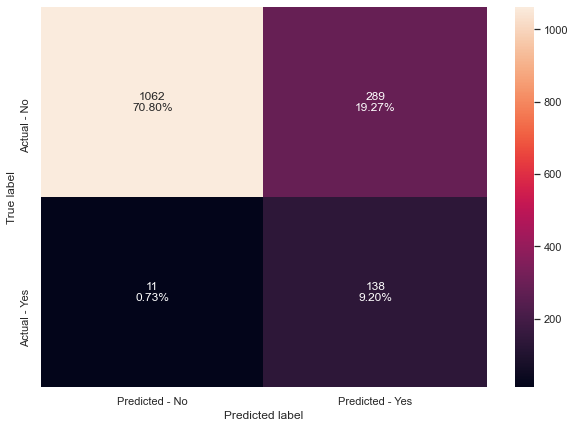

In [89]:
make_confusion_matrix(estimator,X_test,y_test)

In [90]:
scores_LR = get_metrics_score(estimator,X_train,X_test,y_train,y_test,flag=True)

Accuracy on training set :  0.8205714285714286
Accuracy on test set :  0.8
Recall on training set :  0.9546827794561934
Recall on test set :  0.9261744966442953
Precision on training set :  0.3401506996770721
Precision on test set :  0.3231850117096019
F1 on training set :  0.5015873015873016
F1 on test set :  0.47916666666666663


- **Recall on training set :  0.95**
- **Recall on test set :  0.92**

### Recall has improved for both train and test set after hyperparameter tuning and we have a generalized model.

## Visualizing the Decision Tree

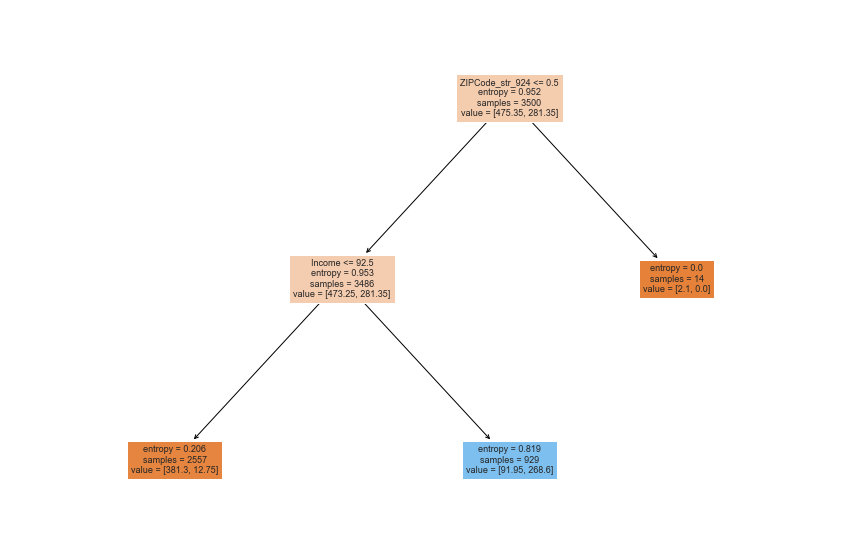

In [91]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [92]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- ZIPCode_str_924 <= 0.50
|   |--- Income <= 92.50
|   |   |--- weights: [381.30, 12.75] class: 0
|   |--- Income >  92.50
|   |   |--- weights: [91.95, 268.60] class: 1
|--- ZIPCode_str_924 >  0.50
|   |--- weights: [2.10, 0.00] class: 0



In [93]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

                           Imp
Income                0.995897
ZIPCode_str_924       0.004103
Age                   0.000000
ZIPCode_str_937       0.000000
ZIPCode_str_944       0.000000
ZIPCode_str_943       0.000000
ZIPCode_str_942       0.000000
ZIPCode_str_941       0.000000
ZIPCode_str_940       0.000000
ZIPCode_str_939       0.000000
ZIPCode_str_936       0.000000
ZIPCode_str_946       0.000000
ZIPCode_str_935       0.000000
ZIPCode_str_934       0.000000
ZIPCode_str_933       0.000000
ZIPCode_str_931       0.000000
ZIPCode_str_930       0.000000
ZIPCode_str_945       0.000000
ZIPCode_str_947       0.000000
ZIPCode_str_927       0.000000
ZIPCode_str_948       0.000000
ZIPCode_str_949       0.000000
ZIPCode_str_950       0.000000
ZIPCode_str_951       0.000000
ZIPCode_str_952       0.000000
ZIPCode_str_953       0.000000
ZIPCode_str_954       0.000000
ZIPCode_str_955       0.000000
ZIPCode_str_956       0.000000
ZIPCode_str_957       0.000000
ZIPCode_str_958       0.000000
ZIPCode_

**`Income is the most important parameter in this model`**

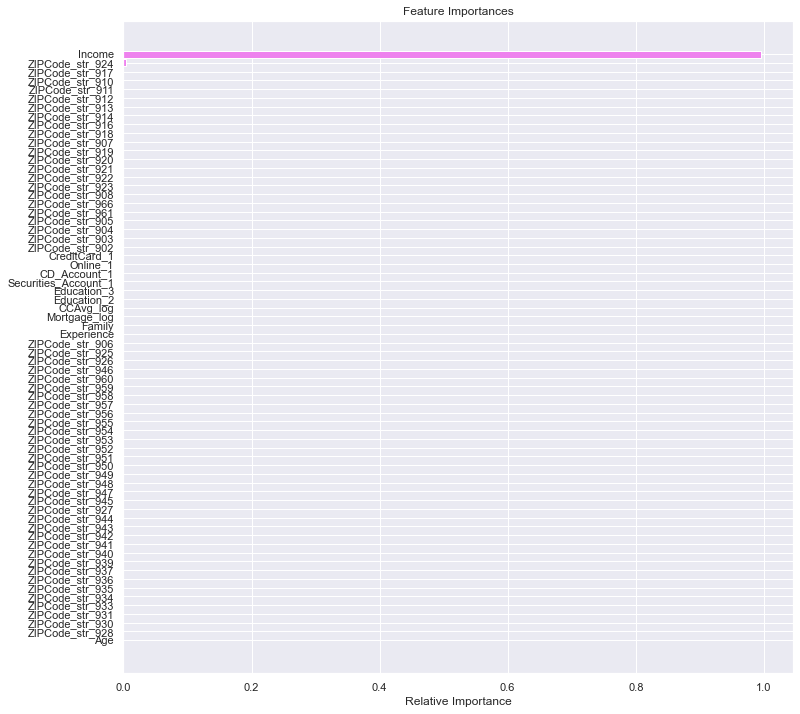

In [94]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Cost Complexity Pruning


- The `DecisionTreeClassifier` provides parameters such as ``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. 
- Cost complexity pruning provides another option to control the size of a tree. 
- In `DecisionTreeClassifier`, this pruning technique is parameterized by the cost complexity parameter, ``ccp_alpha``. 
- Greater values of ``ccp_alpha`` increase the number of nodes pruned. Here we only show the effect of ``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``based on validation scores.

Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [95]:
clf = DecisionTreeClassifier(random_state=1,class_weight = {0:0.15,1:0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [96]:
pd.DataFrame(path)

ccp_alphas    impurities
0   0.000000e+00 -1.791586e-16
1   7.482671e-19 -1.784104e-16
2   7.482671e-19 -1.776621e-16
3   7.482671e-19 -1.769138e-16
4   1.760629e-18 -1.751532e-16
5   2.332833e-18 -1.728204e-16
6   2.332833e-18 -1.704875e-16
7   2.640943e-18 -1.678466e-16
8   4.291532e-18 -1.635551e-16
9   4.665666e-18 -1.588894e-16
10  5.854090e-18 -1.530353e-16
11  1.143528e-16 -3.868248e-17
12  1.898533e-04  3.797065e-04
13  3.369896e-04  1.390675e-03
14  3.643130e-04  1.754988e-03
15  3.643130e-04  2.119301e-03
16  3.744328e-04  2.868167e-03
17  3.744328e-04  3.617033e-03
18  3.879017e-04  4.004934e-03
19  3.915231e-04  4.396457e-03
20  4.753112e-04  7.723636e-03
21  5.432504e-04  8.810137e-03
22  5.761229e-04  9.386260e-03
23  5.907779e-04  1.174937e-02
24  6.700377e-04  1.241941e-02
25  7.438699e-04  1.316328e-02
26  7.793952e-04  1.472207e-02
27  8.521714e-04  1.642641e-02
28  9.095010e-04  1.733591e-02
29  9.404360e-04  1.827635e-02
30  1.011155e-03  1.928750e-02
31  1.109268e-03  2.150604e-02
32  1.399934e-03  2.290597e-02
33  1.644638e-03  2.455061e-02
34  1.814158e-03  2.817893e-02
35  1.819971e-03  2.999890e-02
36  1.928896e-03  3.192780e-02
37  2.685352e-03  3.729850e-02
38  2.742431e-03  4.004093e-02
39  2.758322e-03  4.279925e-02
40  3.335999e-03  4.613525e-02
41  3.527226e-03  4.966248e-02
42  4.169566e-03  5.383204e-02
43  4.391862e-03  5.822390e-02
44  5.138280e-03  6.336218e-02
45  5.262465e-03  6.862465e-02
46  2.253222e-02  9.115687e-02
47  4.072766e-02  2.133399e-01
48  2.537957e-01  4.671356e-01

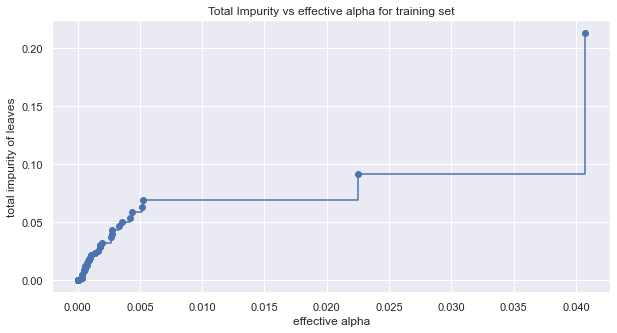

In [97]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [98]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha,class_weight = {0:0.15,1:0.85})
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2537957148948091


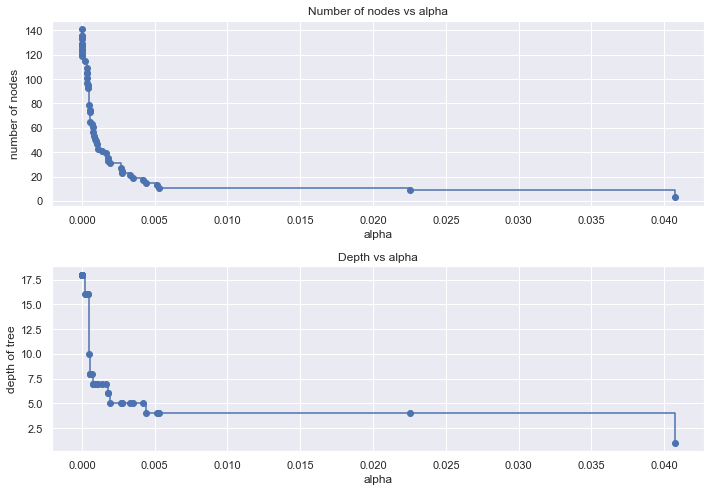

In [99]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [100]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [101]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

In [102]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

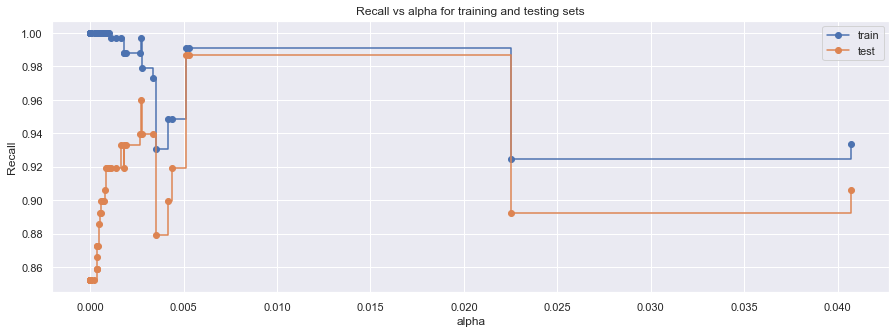

In [103]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post",)
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

**Maximum value of Recall is at 0.014 alpha, but if we choose decision tree will only have a root node and we would lose the buisness rules, instead we can choose alpha 0.002 retaining information and getting higher recall.**

## Recall is metric of interest, since we don't want to miss potential customers from giving the loan.

In [104]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.005138280016554104,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


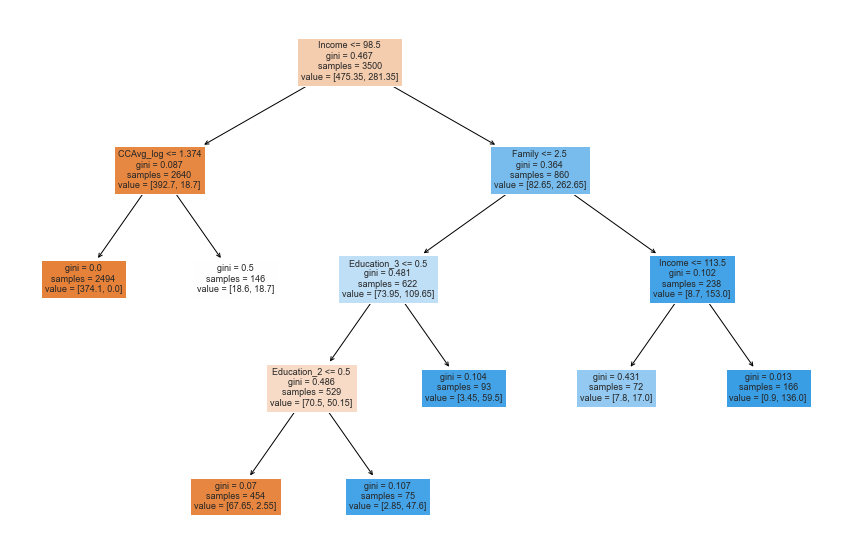

In [105]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

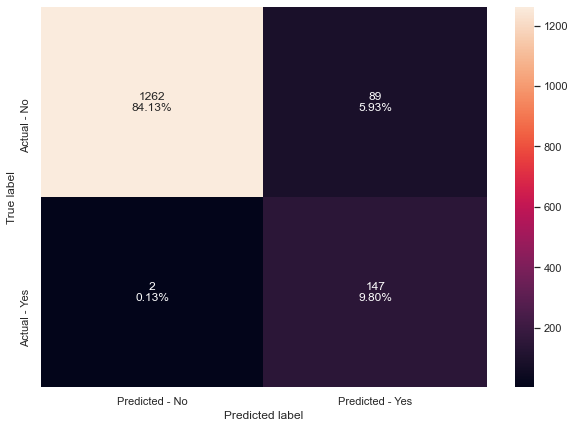

In [106]:
make_confusion_matrix(best_model,X_test,y_test)

In [107]:
scores_LR = get_metrics_score(best_model,X_train,X_test,y_train,y_test,flag=True)

Accuracy on training set :  0.9351428571428572
Accuracy on test set :  0.9393333333333334
Recall on training set :  0.9909365558912386
Recall on test set :  0.9865771812080537
Precision on training set :  0.5942028985507246
Precision on test set :  0.6228813559322034
F1 on training set :  0.7429218573046432
F1 on test set :  0.7636363636363636


In [108]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

                           Imp
Income                0.641593
Education_2           0.158136
Education_3           0.075928
Family                0.068540
CCAvg_log             0.055804
Age                   0.000000
ZIPCode_str_940       0.000000
ZIPCode_str_945       0.000000
ZIPCode_str_944       0.000000
ZIPCode_str_943       0.000000
ZIPCode_str_942       0.000000
ZIPCode_str_941       0.000000
ZIPCode_str_936       0.000000
ZIPCode_str_939       0.000000
ZIPCode_str_937       0.000000
ZIPCode_str_947       0.000000
ZIPCode_str_935       0.000000
ZIPCode_str_934       0.000000
ZIPCode_str_933       0.000000
ZIPCode_str_946       0.000000
ZIPCode_str_950       0.000000
ZIPCode_str_948       0.000000
ZIPCode_str_949       0.000000
ZIPCode_str_930       0.000000
ZIPCode_str_951       0.000000
ZIPCode_str_952       0.000000
ZIPCode_str_953       0.000000
ZIPCode_str_954       0.000000
ZIPCode_str_955       0.000000
ZIPCode_str_956       0.000000
ZIPCode_str_957       0.000000
ZIPCode_

- **Income, Age, CCAvg and Family Size are among the most important parameter to target the potential customer.**

- **Recall on training set :  0.99**
- **Recall on test set :  0.986**

# Actionable Insights & Recommendations

### Comparing Model Performances

In [109]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision treee with hyperparameter tuning',
                                          'Decision tree with post-pruning'], 'Train_Recall':[1,0.95,0.99], 'Test_Recall':[0.84,0.92,0.986]}) 
comparison_frame

Model  Train_Recall  Test_Recall
0                Initial decision tree model          1.00        0.840
1  Decision treee with hyperparameter tuning          0.95        0.920
2            Decision tree with post-pruning          0.99        0.986

- We have achieved the best model by post pruning the tree with Recall of 0.986 in test data.
- The recall in both the test and train data are comparable and nearly equal, thus we can consider it a stable model.

## Conclusions

- Post pruned model have better accuracy in chosen performance metric Recall.
- Logistic regression model has a relatively poorer performance than decision tree.
- **Income**, **Education Level**, **Family Size** and **Average spending on credit cards per month** are the important parameters to be considered.


## Recommendations: 

-  Bank should focus on **corporate customers** more on loan business, since from above models, we can conclude that Education and Income are the top most parameter in deciding the potential customers.

-  Bank can also come up with the schemes like **loan on credit card / coverting credit card bills into loan /EMI**, as we have also concluded from the model that average credit card spending is also one of the stronger flag in deciding the target customers.

- As we have seen , with the larger family size, there is positive chance for loan requiremnet, Thus it also indicates the possibility of vaiability of need among customers like Education loan, Automobile loan etc. , so better segmentation of customer can also lead to detect the **potential customer with specific need**.

---

---

# Misclassification Analysis

In [110]:
pred_test = best_model.predict(X_test)

In [111]:
df_pred = pd.DataFrame(pred_test, columns = ['Predicted'])
df_actual = pd.DataFrame(y_test).reset_index()
df_compare = pd.concat([df_actual, df_pred], axis=1)

In [112]:
for i in range(len(df_compare)):
    df_compare.loc[i, 'MisClass'] = df_compare.loc[i, 'Personal_Loan'] - df_compare.loc[i, 'Predicted']

df_index  = df_compare[df_compare['MisClass'] != 0]
li = df_index['index'].to_list()

## Misclassified Cases | False Negative - Concern

In [113]:
df[df.index.isin(li)][df['Personal_Loan'] == 1] #False Negative Case

Age  Experience  Income  Family Education Personal_Loan  \
322    63          39     101       1         1             1   
1126   32           8     104       2         1             1   

     Securities_Account CD_Account Online CreditCard ZIPCode_str  \
322                   1          1      1          0         920   
1126                  0          0      0          1         951   

      Mortgage_log  CCAvg_log  
322            0.0   1.589235  
1126           0.0   1.547563

**False Negative Case :**
- Here we can see in both the false negative case, that both family size and Education level is low , but still they have taken the loan, that is not been categorized by our model.

- There are two such cases.

In [114]:
df_fp = df[df.index.isin(li)][df['Personal_Loan'] == 0]  #False Negative Case

## EDA - Misclassified Cases | False Positive

In [115]:
df_fp.describe().T

count       mean        std        min        25%        50%  \
Age            89.0  46.415730  11.660743  25.000000  37.000000  47.000000   
Experience     89.0  21.157303  11.638395   0.000000  13.000000  22.000000   
Income         89.0  90.831461  17.096807  51.000000  79.000000  94.000000   
Family         89.0   2.404494   1.184359   1.000000   1.000000   2.000000   
Mortgage_log   89.0   1.159986   2.177369   0.000000   0.000000   0.000000   
CCAvg_log      89.0   1.354393   0.327105   0.587787   1.131402   1.435085   

                     75%         max  
Age            56.000000   67.000000  
Experience     30.000000   43.000000  
Income        105.000000  114.000000  
Family          4.000000    4.000000  
Mortgage_log    0.000000    5.966147  
CCAvg_log       1.568616    1.987874

- Most of the mis-classified as False Postive customers are having higher annual income with median 94K USD.

In [116]:
df_fp.describe(include = 'category').T

count unique  top freq
Education             89      3    3   40
Personal_Loan         89      1    0   89
Securities_Account    89      2    0   76
CD_Account            89      2    0   86
Online                89      2    1   52
CreditCard            89      2    0   61
ZIPCode_str           89     30  921   10

- Most of the customers in the misclassified part (False Postive) are of **Advanced/Professional** level Education

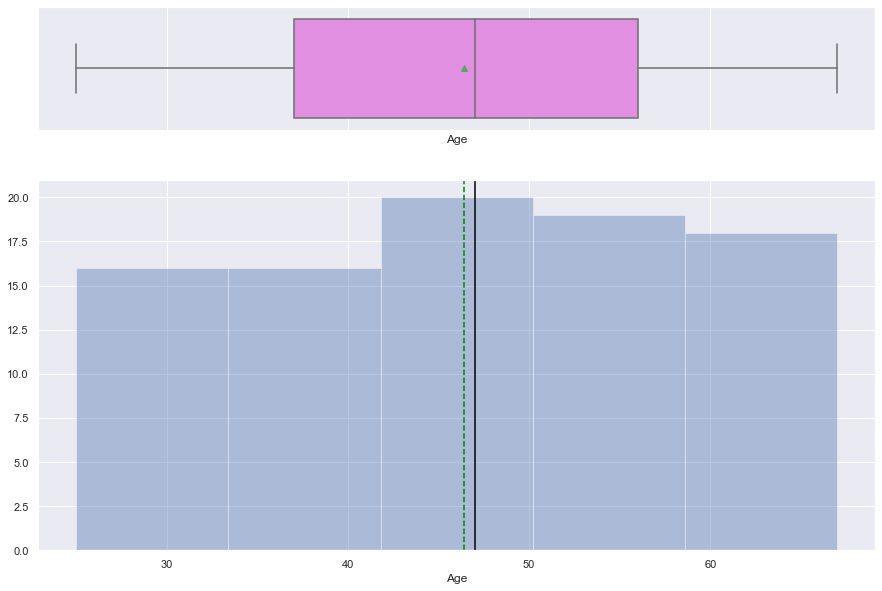

In [117]:
histogram_boxplot(df_fp['Age'])

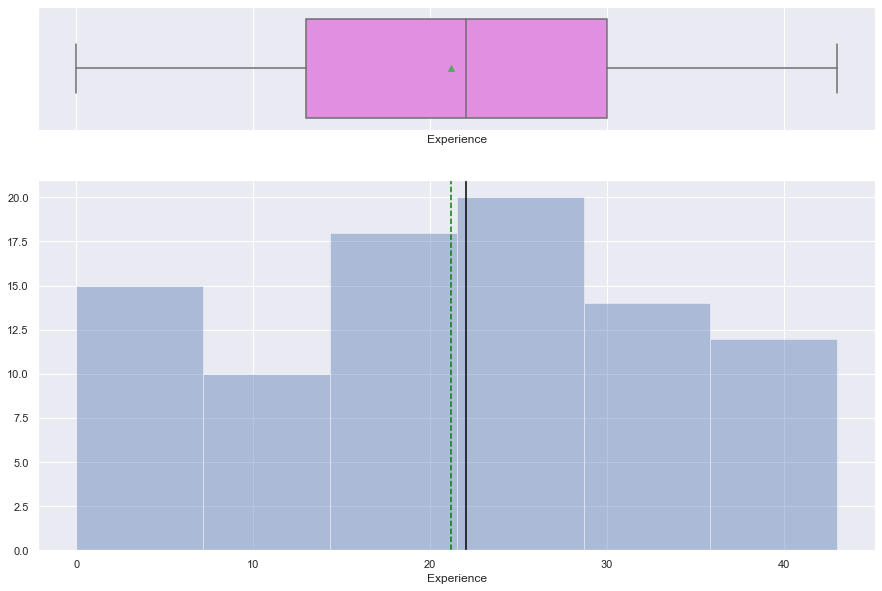

In [118]:
histogram_boxplot(df_fp['Experience'])

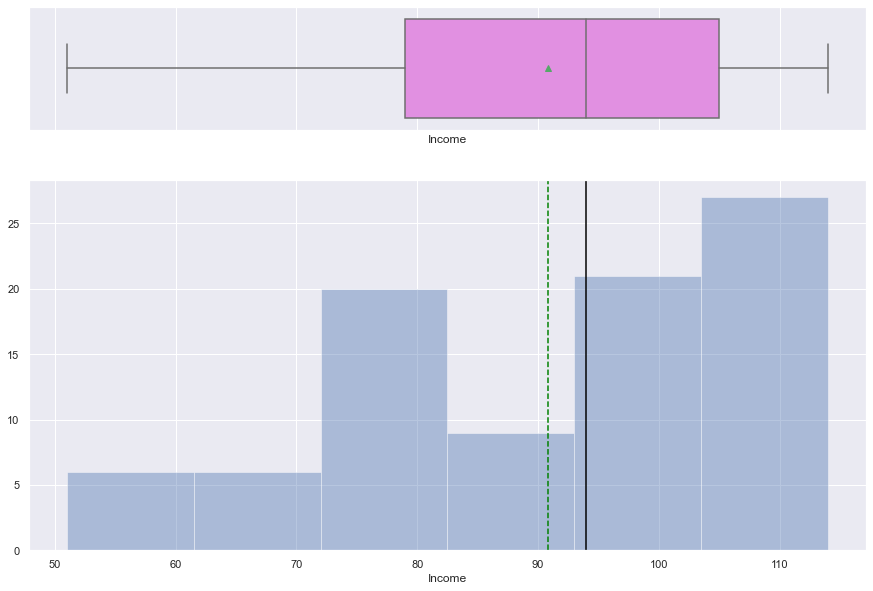

In [119]:
histogram_boxplot(df_fp['Income'])

**Remarks:**
- We can see in our best chosen model based Recall metrics, there exist impure leaf though, that resulted in few misclassified **False Positive cases**.
- Most of the misclassified customers are of higher income segment and good number of years of experience.
- **False Positive Cases** : There are quite a few such cases where cases are misclassified, as the few leaf node we can see in our final tree, are impure (0.4-0.5)
- There are very few cases of **False Negative** misclassified cases, (2 cases) where we can see both family size and Education level is low but still customer opted for loan, that can be considered as an outlier/unlikely scenerio.

# Business Recommendations

-  Bank should focus on **corporate customers** more on loan business, since from above models, we can conclude that Education and Income are the top most parameter in deciding the potential customers.

-  Bank can also come up with the schemes like **loan on credit card / coverting credit card bills into loan /EMI**, as we have also concluded from the model that average credit card spending is also one of the stronger flag in deciding the target customers.

- As we have seen , with the larger family size, there is positive chance for loan requiremnet, Thus it also indicates the possibility of vaiability of need among customers like Education loan, Automobile loan etc. , so better segmentation of customer can also lead to detect the **potential customer with specific need**.